In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm, skew #for some statistics

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
# for ML Modelling

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
carprice = pd.read_csv("automobile.csv",names=['symboling',
'normalized-losses',
'make',
'fuel-type',
'aspiration',
'num-of-doors',
'body-style',
'drive-wheels',
'engine-location',
'wheel-base',
'length',
'width',
'height',
'curb-weight',
'engine-type',
'num-of-cylinders',
'engine-size',
'fuel-system',
'bore',
'stroke',
'compression-ratio',
'horsepower',
'peak-rpm',
'city-mpg',
'highway-mpg',
'price'
])
carprice.head()
    

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.600,...,130,mpfi,3.47,2.68,9.000,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.600,...,130,mpfi,3.47,2.68,9.000,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,...,152,mpfi,2.68,3.47,9.000,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.800,...,109,mpfi,3.19,3.40,10.000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.400,...,136,mpfi,3.19,3.40,8.000,115,5500,18,22,17450


In [3]:
carprice.head().iloc[:,0:14]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823
3,2,164,audi,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337
4,2,164,audi,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824


In [4]:
carprice.head().iloc[:,14:]



,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,dohc,four,130,mpfi,3.47,2.68,9.000,111,5000,21,27,13495
1,dohc,four,130,mpfi,3.47,2.68,9.000,111,5000,21,27,16500
2,ohcv,six,152,mpfi,2.68,3.47,9.000,154,5000,19,26,16500
3,ohc,four,109,mpfi,3.19,3.40,10.000,102,5500,24,30,13950
4,ohc,five,136,mpfi,3.19,3.40,8.000,115,5500,18,22,17450


In [5]:
carprice.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,0.834,98.757,174.049,65.908,53.725,2555.566,126.907,10.143,25.220,30.751
std,1.245,6.022,12.337,2.145,2.444,520.680,41.643,3.972,6.542,6.886
min,-2.000,86.600,141.100,60.300,47.800,1488.000,61.000,7.000,13.000,16.000
25%,0.000,94.500,166.300,64.100,52.000,2145.000,97.000,8.600,19.000,25.000
50%,1.000,97.000,173.200,65.500,54.100,2414.000,120.000,9.000,24.000,30.000
75%,2.000,102.400,183.100,66.900,55.500,2935.000,141.000,9.400,30.000,34.000
max,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,23.000,49.000,54.000


In [72]:
carprice.describe

<bound method NDFrame.describe of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
5            2                 ?         audi       gas        std   
6            1               158         audi       gas        std   
7            1                 ?         audi       gas        std   
8            1               158         audi       gas      turbo   
9            0                 ?         audi       gas      turbo   
10           2               192          bmw       gas        std   
11           0               192          bmw       gas        std   
12           0               188          bmw       gas 

In [6]:
carprice.shape

(205, 26)

In [6]:
print((carprice=='?').sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [7]:
carprice = carprice.replace("?",np.NaN)

In [8]:
carprice.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [77]:
carprice

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.600,...,130,mpfi,3.47,2.68,9.000,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.600,...,130,mpfi,3.47,2.68,9.000,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,...,152,mpfi,2.68,3.47,9.000,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.800,...,109,mpfi,3.19,3.40,10.000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.400,...,136,mpfi,3.19,3.40,8.000,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.800,...,136,mpfi,3.19,3.40,8.500,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.800,...,136,mpfi,3.19,3.40,8.500,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.800,...,136,mpfi,3.19,3.40,8.500,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.800,...,131,mpfi,3.13,3.40,8.300,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.500,...,131,mpfi,3.13,3.40,7.000,160,5500,16,22,NaN


In [9]:
cp = carprice.dropna()

In [10]:
cp.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.800,...,109,mpfi,3.19,3.40,10.000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.400,...,136,mpfi,3.19,3.40,8.000,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.800,...,136,mpfi,3.19,3.40,8.500,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.800,...,131,mpfi,3.13,3.40,8.300,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.200,...,108,mpfi,3.50,2.80,8.800,101,5800,23,29,16430


In [11]:
cp.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.800,...,109,mpfi,3.19,3.40,10.000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.400,...,136,mpfi,3.19,3.40,8.000,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.800,...,136,mpfi,3.19,3.40,8.500,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.800,...,131,mpfi,3.13,3.40,8.300,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.200,...,108,mpfi,3.50,2.80,8.800,101,5800,23,29,16430


In [12]:
cp.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [13]:
cp['normalized-losses'] = cp['normalized-losses'].astype(float)
cp['horsepower'] = cp['horsepower'].astype(float)
cp['peak-rpm'] = cp['peak-rpm'].astype(float)
cp['bore'] = cp['bore'].astype(float)
cp['stroke'] = cp['stroke'].astype(float)
cp['price'] = cp['price'].astype(float)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [19]:
cp.columns = cp.columns.str.replace("-", "")
cp.columns



Index(['symboling', 'normalizedlosses', 'make', 'fueltype', 'aspiration',
       'numofdoors', 'bodystyle', 'drivewheels', 'enginelocation', 'wheelbase',
       'length', 'width', 'height', 'curbweight', 'enginetype',
       'numofcylinders', 'enginesize', 'fuelsystem', 'bore', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'price_log'],
      dtype='object')

Number of Categorical features:  10



 mu = 11445.73 and sigma = 5859.34



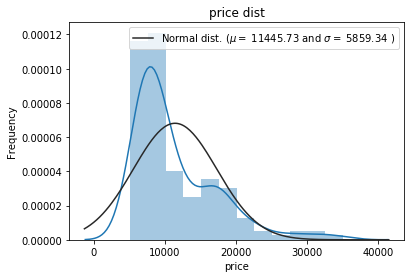

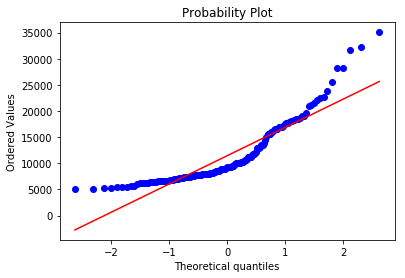

In [14]:
# EDA

# Analysis on Predictor variable

sns.distplot(cp['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(cp['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price dist')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(cp['price'], plot=plt)
plt.show()


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app



 mu = 9.24 and sigma = 0.44



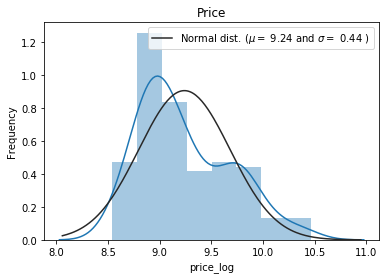

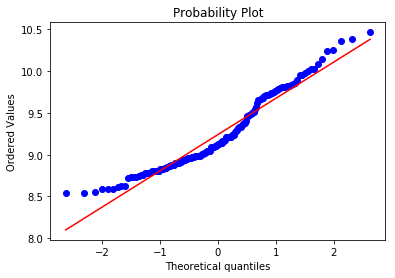

In [15]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
cp["price_log"] = np.log1p(cp["price"])

#Check the new distribution 
sns.distplot(cp['price_log'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(cp['price_log'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(cp['price_log'], plot=plt)
plt.show()

In [30]:
numerical_feats = cp.dtypes[cp.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = cp.dtypes[cp.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  18
Number of Categorical features:  10


In [21]:
cp

,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,...,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_log
3,2,164.000,audi,gas,std,four,sedan,fwd,front,99.800,...,mpfi,3.190,3.400,10.000,102.000,5500.000,24,30,13950.000,9.543
4,2,164.000,audi,gas,std,four,sedan,4wd,front,99.400,...,mpfi,3.190,3.400,8.000,115.000,5500.000,18,22,17450.000,9.767
6,1,158.000,audi,gas,std,four,sedan,fwd,front,105.800,...,mpfi,3.190,3.400,8.500,110.000,5500.000,19,25,17710.000,9.782
8,1,158.000,audi,gas,turbo,four,sedan,fwd,front,105.800,...,mpfi,3.130,3.400,8.300,140.000,5500.000,17,20,23875.000,10.081
10,2,192.000,bmw,gas,std,two,sedan,rwd,front,101.200,...,mpfi,3.500,2.800,8.800,101.000,5800.000,23,29,16430.000,9.707
11,0,192.000,bmw,gas,std,four,sedan,rwd,front,101.200,...,mpfi,3.500,2.800,8.800,101.000,5800.000,23,29,16925.000,9.737
12,0,188.000,bmw,gas,std,two,sedan,rwd,front,101.200,...,mpfi,3.310,3.190,9.000,121.000,4250.000,21,28,20970.000,9.951
13,0,188.000,bmw,gas,std,four,sedan,rwd,front,101.200,...,mpfi,3.310,3.190,9.000,121.000,4250.000,21,28,21105.000,9.957
18,2,121.000,chevrolet,gas,std,two,hatchback,fwd,front,88.400,...,2bbl,2.910,3.030,9.500,48.000,5100.000,47,53,5151.000,8.547
19,1,98.000,chevrolet,gas,std,two,hatchback,fwd,front,94.500,...,2bbl,3.030,3.110,9.600,70.000,5400.000,38,43,6295.000,8.748


In [22]:
print(cp[numerical_feats].columns)
print(cp[categorical_feats].columns)


Index(['symboling', 'normalizedlosses', 'wheelbase', 'length', 'width',
       'height', 'curbweight', 'enginesize', 'bore', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'price_log'],
      dtype='object')
Index(['make', 'fueltype', 'aspiration', 'numofdoors', 'bodystyle',
       'drivewheels', 'enginelocation', 'enginetype', 'numofcylinders',
       'fuelsystem'],
      dtype='object')


In [23]:
for col in numerical_feats:
    print('****************')
    print(col)
    print("Skewness: %f" % cp[col].skew())
    print("Kurtosis: %f" % cp[col].kurt())
    

****************
symboling
Skewness: 0.094950
Kurtosis: -0.528233
****************
normalizedlosses
Skewness: 0.835766
Kurtosis: 0.623170
****************
wheelbase
Skewness: 0.914750
Kurtosis: 0.636783
****************
length
Skewness: -0.065976
Kurtosis: -0.207685
****************
width
Skewness: 0.916846
Kurtosis: 0.851433
****************
height
Skewness: 0.168402
Kurtosis: -0.279710
****************
curbweight
Skewness: 0.782035
Kurtosis: 0.153411
****************
enginesize
Skewness: 1.490610
Kurtosis: 2.950273
****************
bore
Skewness: 0.156422
Kurtosis: -0.823175
****************
stroke
Skewness: -0.992743
Kurtosis: 2.531782
****************
compressionratio
Skewness: 2.710242
Kurtosis: 5.725790
****************
horsepower
Skewness: 0.916663
Kurtosis: 0.298877
****************
peakrpm
Skewness: 0.148252
Kurtosis: 0.400257
****************
citympg
Skewness: 0.733666
Kurtosis: 1.149276
****************
highwaympg
Skewness: 0.601052
Kurtosis: 0.829131
****************
price


Skewness: 2.710242
Kurtosis: 5.725790


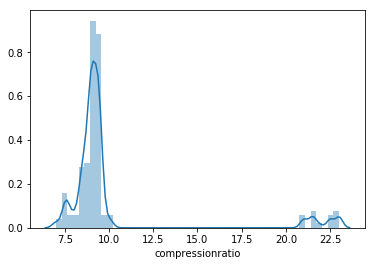

In [25]:
# Tranform variables with high skewness and Kurtosis

sns.distplot(cp['compressionratio']);
#skewness and kurtosis
print("Skewness: %f" % cp['compressionratio'].skew())
print("Kurtosis: %f" % cp['compressionratio'].kurt())

Skewness: 1.490610
Kurtosis: 2.950273


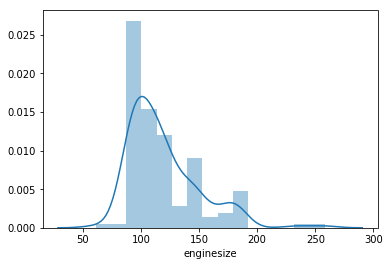

In [26]:
# Tranform variables with high skewness and Kurtosis

sns.distplot(cp['enginesize']);
#skewness and kurtosis
print("Skewness: %f" % cp['enginesize'].skew())
print("Kurtosis: %f" % cp['enginesize'].kurt())

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


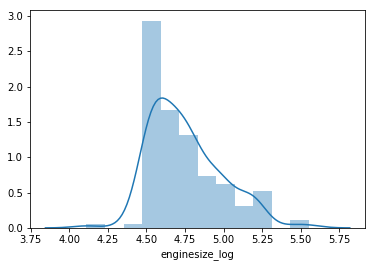

In [28]:
cp['enginesize_log'] = np.log(cp['enginesize'])
sns.distplot(cp['enginesize_log']);

In [32]:
numerical_feats = cp.dtypes[cp.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = cp.dtypes[cp.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  18
Number of Categorical features:  10


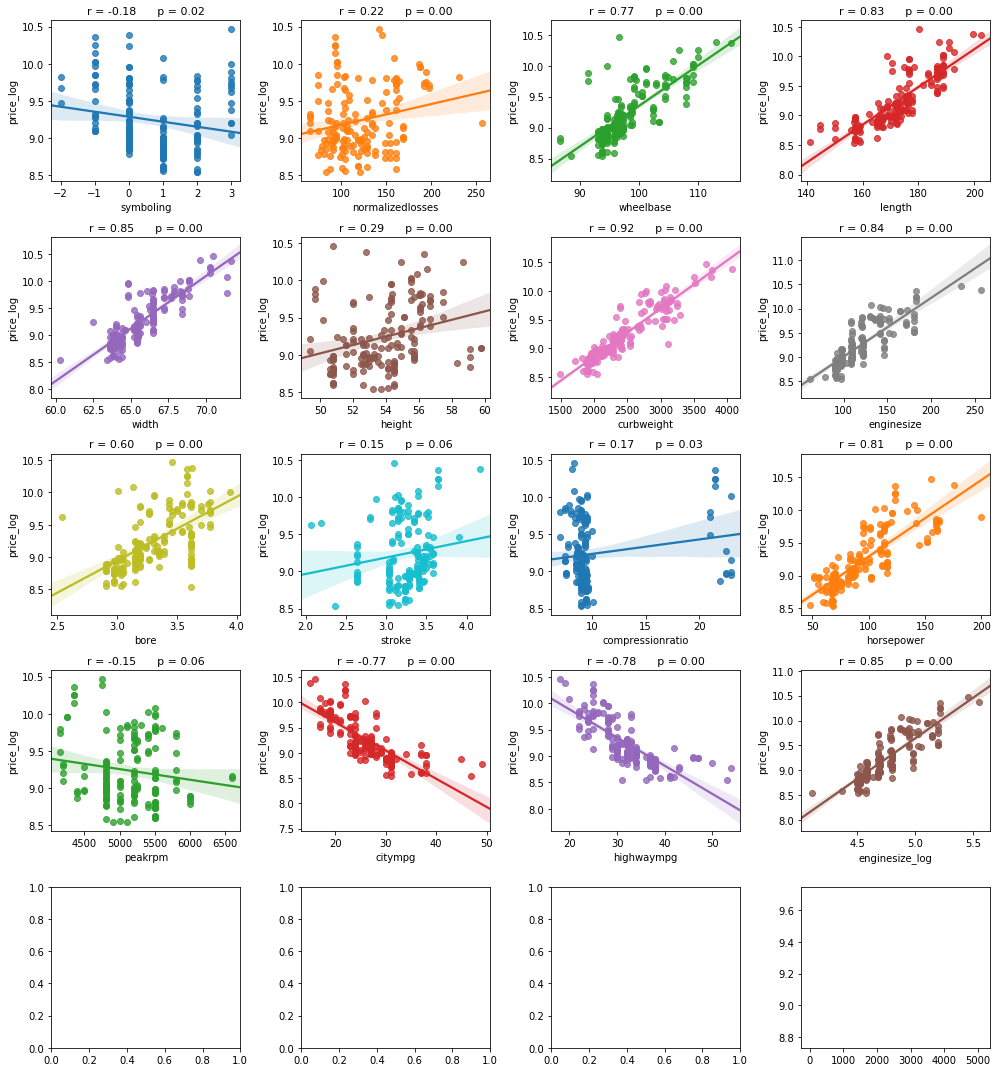

In [34]:
nr_rows = 5
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['price', 'price_log']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(cp[li_plot_num_feats[i]], cp['price_log'], ax = axs[r][c])
            stp = stats.pearsonr(cp[li_plot_num_feats[i]], cp['price_log'])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   





In [ ]:
#Correlation map to see how features are correlated with SalePrice
corrmat = cp.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [36]:
cor = cp.corr()
cor

,symboling,normalizedlosses,wheelbase,length,width,height,curbweight,enginesize,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_log,enginesize_log
symboling,1.000,0.518,-0.521,-0.336,-0.219,-0.475,-0.252,-0.109,-0.256,-0.021,-0.138,-0.004,0.199,0.090,0.150,-0.163,-0.181,-0.134
normalizedlosses,0.518,1.000,-0.060,0.036,0.110,-0.414,0.126,0.208,-0.032,0.063,-0.127,0.291,0.238,-0.236,-0.189,0.203,0.225,0.199
wheelbase,-0.521,-0.060,1.000,0.872,0.815,0.556,0.810,0.649,0.578,0.167,0.291,0.517,-0.289,-0.581,-0.612,0.734,0.765,0.686
length,-0.336,0.036,0.872,1.000,0.838,0.499,0.871,0.726,0.646,0.121,0.185,0.672,-0.234,-0.725,-0.725,0.761,0.833,0.779
width,-0.219,0.110,0.815,0.838,1.000,0.293,0.871,0.779,0.573,0.197,0.259,0.682,-0.232,-0.667,-0.693,0.843,0.852,0.807
height,-0.475,-0.414,0.556,0.499,0.293,1.000,0.367,0.111,0.255,-0.091,0.233,0.034,-0.246,-0.200,-0.226,0.245,0.290,0.151
curbweight,-0.252,0.126,0.810,0.871,0.871,0.367,1.000,0.889,0.646,0.174,0.225,0.790,-0.260,-0.762,-0.789,0.894,0.917,0.901
enginesize,-0.109,0.208,0.649,0.726,0.779,0.111,0.889,1.000,0.596,0.300,0.141,0.812,-0.285,-0.699,-0.714,0.841,0.835,0.987
bore,-0.256,-0.032,0.578,0.646,0.573,0.255,0.646,0.596,1.000,-0.103,0.015,0.560,-0.312,-0.590,-0.591,0.534,0.598,0.650
stroke,-0.021,0.063,0.167,0.121,0.197,-0.091,0.174,0.300,-0.103,1.000,0.244,0.149,-0.011,-0.020,-0.013,0.161,0.147,0.288


In [37]:
cor_val = cor['price_log'].abs().sort_values(ascending = False)
cor_df = pd.DataFrame({'Cor' :cor_val})
cor_df

,Cor
price_log,1.000
price,0.970
curbweight,0.917
enginesize_log,0.853
width,0.852
enginesize,0.835
length,0.833
horsepower,0.811
highwaympg,0.780
citympg,0.769


Text(0.5, 1.0, 'Continuous Predictor Strength')

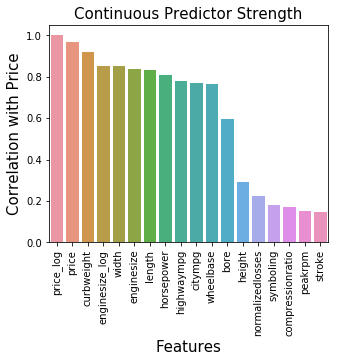

In [38]:
f, ax = plt.subplots(figsize=(5, 4))
plt.xticks(rotation='90')
sns.barplot(x=cor_val.index, y=cor_val)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation with Price', fontsize=15)
plt.title('Continuous Predictor Strength', fontsize=15)

In [39]:
for catg in list(categorical_feats) :
    print(cp[catg].value_counts())
    print('#'*50)


toyota           31
nissan           18
honda            13
subaru           12
mazda            11
volvo            11
mitsubishi       10
dodge             8
volkswagen        8
peugot            7
saab              6
plymouth          6
mercedes-benz     5
audi              4
bmw               4
chevrolet         3
porsche           1
jaguar            1
Name: make, dtype: int64
##################################################
gas       144
diesel     15
Name: fueltype, dtype: int64
##################################################
std      132
turbo     27
Name: aspiration, dtype: int64
##################################################
four    95
two     64
Name: numofdoors, dtype: int64
##################################################
sedan          79
hatchback      56
wagon          17
hardtop         5
convertible     2
Name: bodystyle, dtype: int64
##################################################
fwd    105
rwd     46
4wd      8
Name: drivewheels, dtype: int64
########

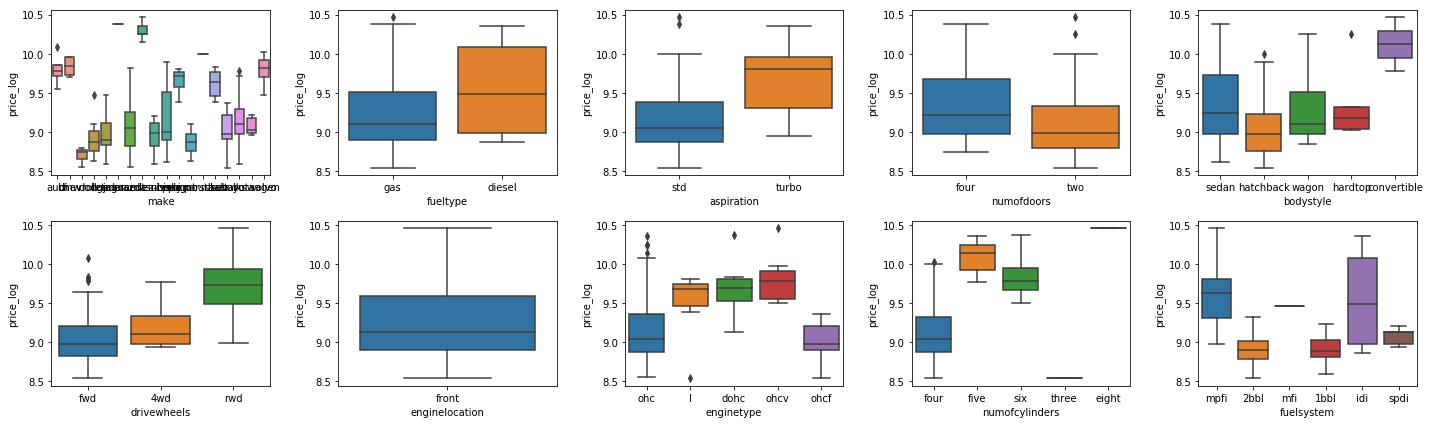

In [40]:
li_cat_feats = list(categorical_feats)
nr_rows = 2
nr_cols = 5

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y='price_log', data=cp, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

In [45]:
catg_strong_corr = [ 'make', 'aspiration', 'bodystyle', 'drivewheels', 'enginetype', 
                     'numofcylinders','fuelsystem']

catg_weak_corr = ['fultype', 'numofdoors', 'enginelocation']

In [46]:
num_strong_corr = [ 'curbweight', 'enginesize_log', 'width', 'length', 'horsepower', 
                     'higwaympg','citympg','wheelbase','bore']

num_weak_corr = ['height', 'normallizedlosses', 'symboling', 'compressionratio','weakrpm','stroke']


In [49]:
for catg in catg_strong_corr :
    print('********************************')
    g = cp.groupby(catg)['price_log'].mean()
    print(g)

********************************
make
audi             9.793
bmw              9.838
chevrolet        8.695
dodge            8.927
honda            8.983
jaguar          10.381
mazda            9.054
mercedes-benz   10.294
mitsubishi       8.946
nissan           9.174
peugot           9.655
plymouth         8.865
porsche         10.000
saab             9.616
subaru           9.028
toyota           9.137
volkswagen       9.071
volvo            9.786
Name: price_log, dtype: float64
********************************
aspiration
std     9.153
turbo   9.662
Name: price_log, dtype: float64
********************************
bodystyle
convertible   10.122
hardtop        9.361
hatchback      9.050
sedan          9.341
wagon          9.251
Name: price_log, dtype: float64
********************************
drivewheels
4wd   9.197
fwd   9.034
rwd   9.716
Name: price_log, dtype: float64
********************************
enginetype
dohc   9.672
l      9.516
ohc    9.177
ohcf   9.028
ohcv   9.812
Name: pric

In [92]:
# 'make'
make_catg2 = ['audi','bmw','volvo','peugot','saab']
make_catg3 = ['porsche','mercedes-benz','jaguar'] 


# aspiration
aspirn_catg2 = ['turbo']


# bodystyle
bdystl_catg2 = ['sedan','wagon','hardtop']
bdystl_catg3 = ['convertible'] 

# drivewheels
drwls_catg2 = ['rwd']
                
# enginetype
engtyp_catg2 = ['dohc','ohcv','l']
                
# numofcylinders
numcyl_catg2 = ['five','six']
numcyl_catg3 = ['eight']
                

# fuelsystem
fuelsys_catg2 = ['mpfi','mfi','idi']    

In [93]:
for df in [cp]:
    
    cp['make_num'] = 1  
    cp.loc[(cp['make'].isin(make_catg2) ), 'make_num'] = 2    
    cp.loc[(cp['make'].isin(make_catg3) ), 'make_num'] = 3        

    cp['aspiration_num'] = 1  
    cp.loc[(cp['aspiration'].isin(aspirn_catg2) ), 'aspiration_num'] = 2    

    cp['bodystyle_num'] = 1  
    cp.loc[(cp['bodystyle'].isin(bdystl_catg2) ), 'bodystyle_num'] = 2    
    cp.loc[(cp['bodystyle'].isin(bdystl_catg3) ), 'bodystyle_num'] = 3    

    cp['drivewheels_num'] = 1  
    cp.loc[(cp['drivewheels'].isin(drwls_catg2) ), 'drivewheels_num'] = 2    

    cp['enginetype_num'] = 1  
    cp.loc[(cp['enginetype'].isin(engtyp_catg2) ), 'enginetype_num'] = 2    
    
    cp['numofcylinders_num'] = 1  
    cp.loc[(cp['numofcylinders'].isin(numcyl_catg2) ), 'numofcylinders_num'] = 2    
    cp.loc[(cp['numofcylinders'].isin(numcyl_catg3) ), 'numofcylinders_num'] = 3    
                
    cp['fuelsystem_num'] = 1  
    cp.loc[(cp['fuelsystem'].isin(fuelsys_catg2) ), 'fuelsystem_num'] = 2    

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [153]:
cp_df =cp.loc[:,['curbweight', 'enginesize_log', 'width', 'length', 'horsepower','highwaympg','citympg','wheelbase','bore','make_num','aspiration_num','bodystyle_num',
          'drivewheels_num','enginetype_num','numofcylinders_num','fuelsystem_num','price_log']]

In [154]:
cp_df.iloc[:,:]


,curbweight,enginesize_log,width,length,horsepower,highwaympg,citympg,wheelbase,bore,make_num,aspiration_num,bodystyle_num,drivewheels_num,enginetype_num,numofcylinders_num,fuelsystem_num,price_log
3,2337,4.691,66.200,176.600,102.000,30,24,99.800,3.190,2,1,2,1,1,1,2,9.543
4,2824,4.913,66.400,176.600,115.000,22,18,99.400,3.190,2,1,2,1,1,2,2,9.767
6,2844,4.913,71.400,192.700,110.000,25,19,105.800,3.190,2,1,2,1,1,2,2,9.782
10,2395,4.682,64.800,176.800,101.000,29,23,101.200,3.500,2,1,2,2,1,1,2,9.707
11,2395,4.682,64.800,176.800,101.000,29,23,101.200,3.500,2,1,2,2,1,1,2,9.737
12,2710,5.100,64.800,176.800,121.000,28,21,101.200,3.310,2,1,2,2,1,2,2,9.951
13,2765,5.100,64.800,176.800,121.000,28,21,101.200,3.310,2,1,2,2,1,2,2,9.957
18,1488,4.111,60.300,141.100,48.000,53,47,88.400,2.910,1,1,1,1,2,1,1,8.547
19,1874,4.500,63.600,155.900,70.000,43,38,94.500,3.030,1,1,1,1,1,1,1,8.748
20,1909,4.500,63.600,158.800,70.000,43,38,94.500,3.030,1,1,2,1,1,1,1,8.791


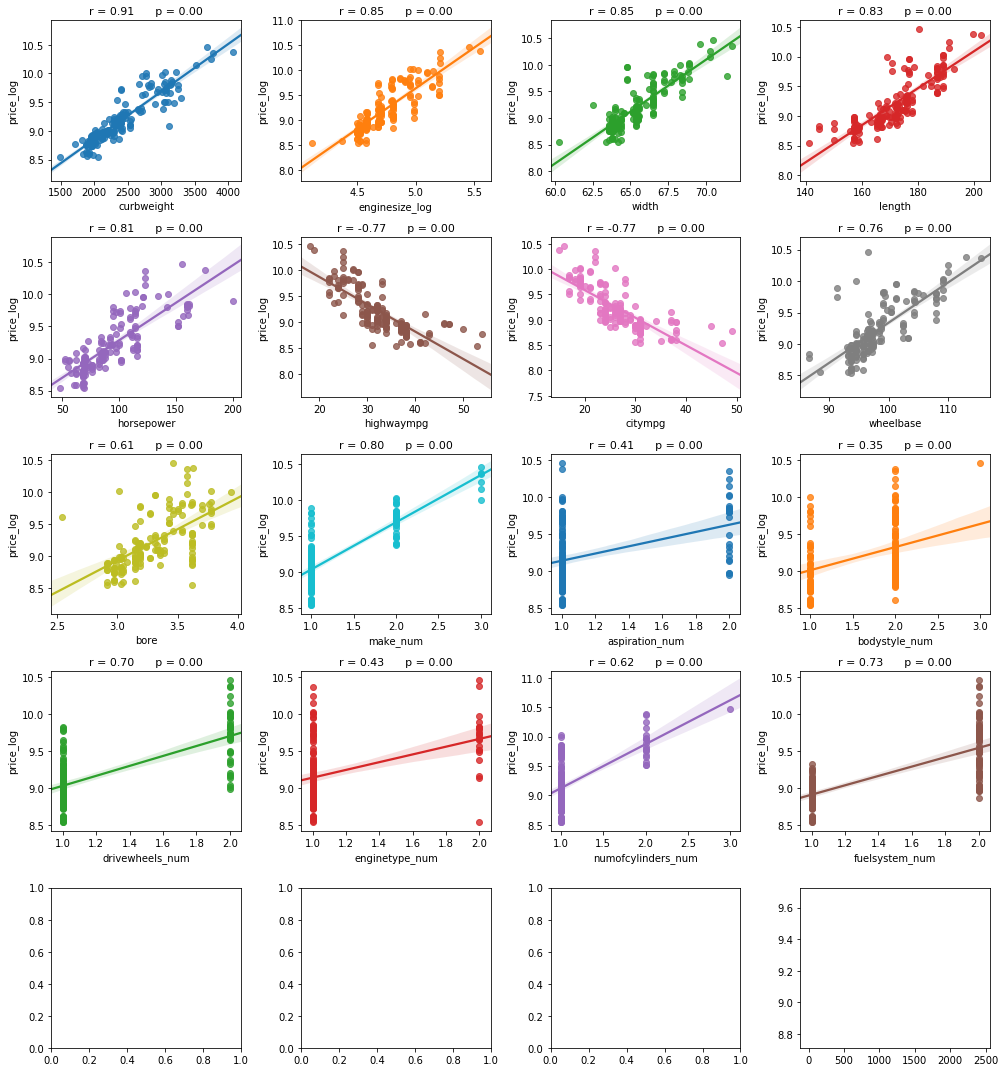

In [155]:
nr_rows = 5
nr_cols = 4
num_feats = cp_df.columns

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(num_feats)
li_not_plot = ['price_log']
li_plot_num_feats = [c for c in list(num_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(cp_df[li_plot_num_feats[i]], cp_df['price_log'], ax = axs[r][c])
            stp = stats.pearsonr(cp_df[li_plot_num_feats[i]], cp_df['price_log'])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

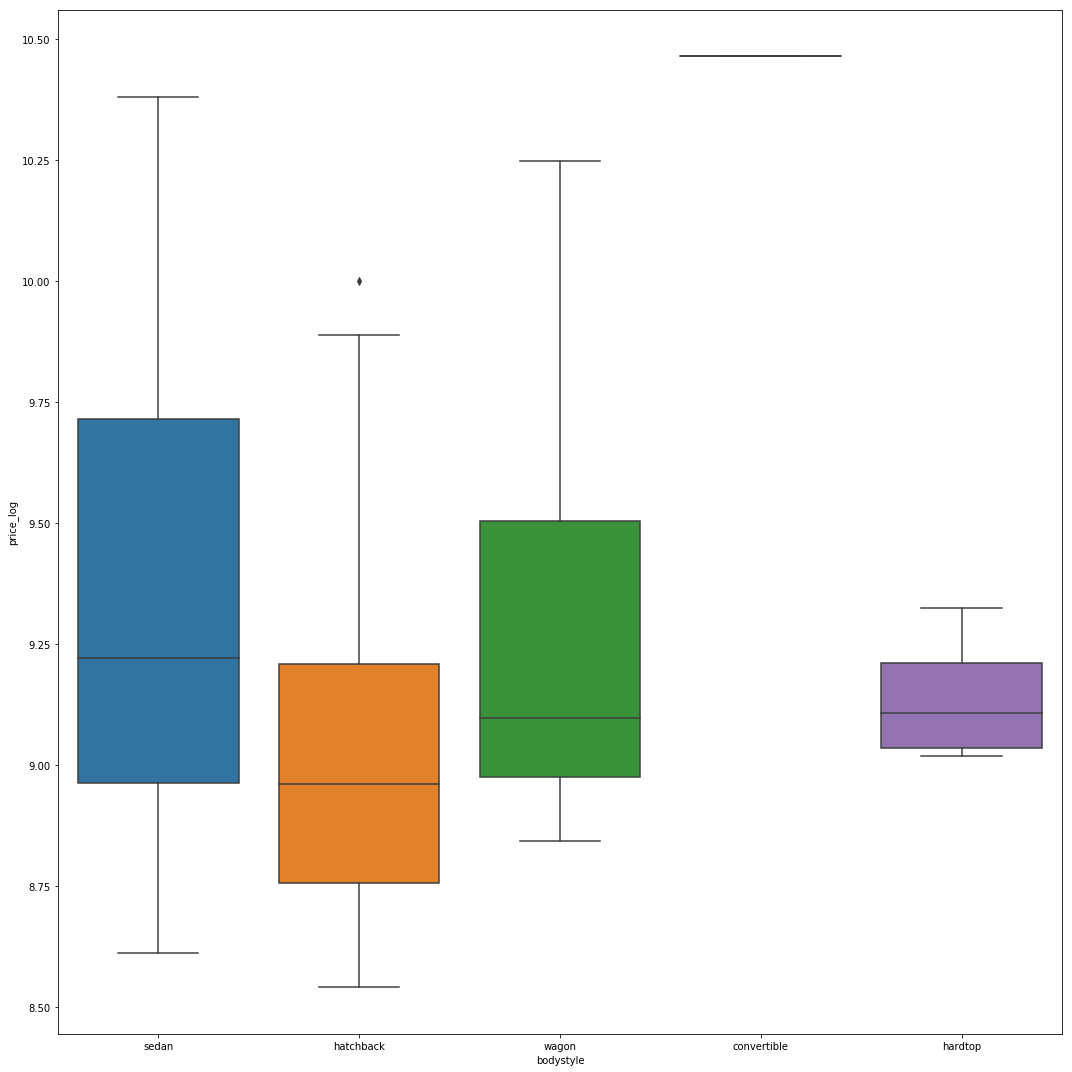

In [152]:
plt.subplots(1, 1, figsize=(15,15))
sns.boxplot('bodystyle', y='price_log', data=cp)
    
plt.tight_layout()    
plt.show()   

In [123]:
cp = cp.drop(cp.index[(cp['make']=='dodge') & (cp['price_log']>9.25)])


In [129]:
cp = cp.drop(cp.index[(cp['make']=='audi') & (cp['price_log']>10)])

In [141]:
cp = cp.drop(cp.index[(cp['make']=='toyota') & (cp['price_log']>9.71)])

In [150]:
cp = cp.drop(cp.index[(cp['bodystyle']=='hardtop') & (cp['price_log']>10.1)])

In [151]:
cp.shape

(154, 35)

In [161]:
numeric_feats = cp_df.dtypes[cp.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = cp_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})

skewness


Skew in numerical features: 



,Skew
numofcylinders_num,2.473
enginetype_num,1.968
aspiration_num,1.898
make_num,1.537
drivewheels_num,0.984
wheelbase,0.841
width,0.811
enginesize_log,0.741
price_log,0.664
curbweight,0.506


In [160]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


from scipy.special import boxcox1p
skewed_features = skewness.index

lam = 0.15
for feat in skewed_features:
    cp_df[feat] = boxcox1p(cp_df[feat], lam)

There are 17 skewed numerical features to Box Cox transform


In [167]:
cp_df.head()

,curbweight,enginesize_log,width,length,horsepower,highwaympg,citympg,wheelbase,bore,make_num,aspiration_num,bodystyle_num,drivewheels_num,enginetype_num,numofcylinders_num,fuelsystem_num,price_log
3,14.675,1.987,5.865,7.832,6.694,4.492,4.138,6.651,1.598,1.194,0.730,1.194,0.730,0.730,0.730,1.194,2.825
4,15.290,2.036,5.871,7.832,6.935,4.003,3.702,6.643,1.598,1.194,0.730,1.194,0.730,0.730,1.194,1.194,2.855
6,15.313,2.036,6.006,8.022,6.845,4.201,3.782,6.767,1.598,1.194,0.730,1.194,0.730,0.730,1.194,1.194,2.857
10,14.754,1.985,5.826,7.834,6.675,4.437,4.072,6.679,1.687,1.194,0.730,1.194,1.194,0.730,0.730,1.194,2.847
11,14.754,1.985,5.826,7.834,6.675,4.437,4.072,6.679,1.687,1.194,0.730,1.194,1.194,0.730,0.730,1.194,2.851


In [165]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
cp_sc = sc.fit_transform(cp_df)



In [168]:
cp_df_sc = pd.DataFrame(cp_sc)

In [169]:
cp_df_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.153,-0.216,0.377,0.416,0.386,-0.299,-0.385,0.348,-0.374,1.468,-0.430,0.714,-0.622,-0.419,-0.370,1.026,0.768
1,0.871,0.765,0.484,0.416,0.795,-1.825,-1.616,0.269,-0.374,1.468,-0.430,0.714,-0.622,-0.419,2.514,1.026,1.276
2,0.910,0.765,3.075,1.735,0.643,-1.207,-1.389,1.493,-0.374,1.468,-0.430,0.714,-0.622,-0.419,2.514,1.026,1.309
3,-0.022,-0.257,-0.380,0.433,0.353,-0.470,-0.571,0.620,0.778,1.468,-0.430,0.714,1.607,-0.419,-0.370,1.026,1.140
4,-0.022,-0.257,-0.380,0.433,0.353,-0.470,-0.571,0.620,0.778,1.468,-0.430,0.714,1.607,-0.419,-0.370,1.026,1.207


In [170]:
cp_df_sc.shape

(154, 17)

In [171]:
cp_df_sc.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000
std,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003
min,-2.481,-2.950,-2.908,-2.895,-2.012,-2.766,-2.361,-2.390,-3.047,-0.541,-0.430,-1.350,-0.622,-0.419,-0.370,-0.974,-1.624
25%,-0.864,-0.746,-0.818,-0.565,-0.894,-0.646,-0.571,-0.713,-0.918,-0.541,-0.430,-1.350,-0.622,-0.419,-0.370,-0.974,-0.750
50%,-0.176,-0.216,-0.054,0.021,-0.107,0.029,-0.030,-0.256,-0.127,-0.541,-0.430,0.714,-0.622,-0.419,-0.370,-0.974,-0.266
75%,0.719,0.497,0.537,0.518,0.750,0.781,0.767,0.465,0.922,-0.541,-0.430,0.714,1.607,-0.419,-0.370,1.026,0.693
max,2.927,3.435,3.225,2.501,2.785,2.830,2.959,3.250,2.303,2.970,2.327,2.256,1.607,2.387,4.669,1.026,2.802


In [172]:
x = cp_df_sc
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.153,-0.216,0.377,0.416,0.386,-0.299,-0.385,0.348,-0.374,1.468,-0.430,0.714,-0.622,-0.419,-0.370,1.026,0.768
1,0.871,0.765,0.484,0.416,0.795,-1.825,-1.616,0.269,-0.374,1.468,-0.430,0.714,-0.622,-0.419,2.514,1.026,1.276
2,0.910,0.765,3.075,1.735,0.643,-1.207,-1.389,1.493,-0.374,1.468,-0.430,0.714,-0.622,-0.419,2.514,1.026,1.309
3,-0.022,-0.257,-0.380,0.433,0.353,-0.470,-0.571,0.620,0.778,1.468,-0.430,0.714,1.607,-0.419,-0.370,1.026,1.140
4,-0.022,-0.257,-0.380,0.433,0.353,-0.470,-0.571,0.620,0.778,1.468,-0.430,0.714,1.607,-0.419,-0.370,1.026,1.207


In [173]:
x.columns

RangeIndex(start=0, stop=17, step=1)

In [187]:
y = cp_df_sc.iloc[:,16:17]
y.head()

,16
0,0.768
1,1.276
2,1.309
3,1.140
4,1.207


In [228]:
train,test = train_test_split(cp_df_sc,shuffle = True, test_size = 0.2,random_state = 88)

In [229]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
104,0.034,-0.257,-0.054,0.160,-0.338,-0.470,-0.571,-0.226,1.206,-0.541,-0.430,0.714,-0.622,-0.419,-0.370,-0.974,-0.529
31,-1.267,-1.040,-0.708,-1.138,-0.940,-0.133,0.616,-1.001,-0.997,-0.541,-0.430,-1.350,-0.622,-0.419,-0.370,-0.974,-1.587
105,0.524,-0.257,-0.054,0.160,0.674,-1.612,-0.571,-0.226,1.206,-0.541,2.327,0.714,-0.622,-0.419,-0.370,1.026,0.362
151,1.226,1.796,1.799,1.425,1.328,-1.612,-1.616,2.099,1.065,1.468,-0.430,0.714,1.607,2.387,2.514,1.026,1.740
60,-0.912,-0.746,-0.929,-0.136,-0.894,0.781,0.767,-0.713,-0.528,-0.541,-0.430,0.714,-0.622,-0.419,-0.370,-0.974,-0.737


In [231]:
y_train = train.iloc[:,16:17]
y_train.head()

,16
104,-0.529
31,-1.587
105,0.362
151,1.740
60,-0.737


In [235]:
x_train = train.iloc[:,0:16]
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
104,0.034,-0.257,-0.054,0.160,-0.338,-0.470,-0.571,-0.226,1.206,-0.541,-0.430,0.714,-0.622,-0.419,-0.370,-0.974
31,-1.267,-1.040,-0.708,-1.138,-0.940,-0.133,0.616,-1.001,-0.997,-0.541,-0.430,-1.350,-0.622,-0.419,-0.370,-0.974
105,0.524,-0.257,-0.054,0.160,0.674,-1.612,-0.571,-0.226,1.206,-0.541,2.327,0.714,-0.622,-0.419,-0.370,1.026
151,1.226,1.796,1.799,1.425,1.328,-1.612,-1.616,2.099,1.065,1.468,-0.430,0.714,1.607,2.387,2.514,1.026
60,-0.912,-0.746,-0.929,-0.136,-0.894,0.781,0.767,-0.713,-0.528,-0.541,-0.430,0.714,-0.622,-0.419,-0.370,-0.974


In [236]:
y_test = test.iloc[:,16:17]
x_test = test.iloc[:,0:16]

In [245]:
lrm = LinearRegression()
model = lrm.fit(x_train,y_train)
y_pred_train = model.predict(x_train)

In [246]:
from sklearn.metrics import r2_score
y_pred_test = model.predict(x_test)
r2_score(y_test,y_pred_test)


0.951767373788476

In [222]:
model.coef_

array([[ 2.83537580e-16, -1.19863226e-16, -1.77437738e-16,
        -1.67351429e-16,  3.36186875e-16, -9.21603079e-17,
         3.04716215e-16, -8.39363923e-17, -2.65664377e-16,
         2.70219149e-16,  4.26572773e-18,  3.27950141e-17,
         1.38049992e-16, -1.34539698e-16, -1.57141329e-16,
         2.49460699e-16,  1.00000000e+00]])

In [247]:
r2_score(y_train,x_pred)

0.9190208558099799

In [258]:
model.coef_

0     0.317
1     1.072
2     0.054
3     0.382
4     0.825
5    -0.299
6    -0.385
7     0.072
8     1.206
9    -0.541
10   -0.430
11   -1.350
12    1.607
13   -0.419
14   -0.370
15    1.026
Name: 125, dtype: float64

In [256]:
actual_data = np.array(y_test)

for i in range(len(y_pred_train)-1):
    actual = actual_data[i]
    predicted = y_pred_test[i]
    explained = ((actual_data[i] - y_pred_test[i])/actual_data[i])*100
    print(actual,predicted,explained)

[-0.65534137] [-0.76678222] [-17.00500817]
[-0.2661563] [-0.15270375] [42.6262864]
[1.85372806] [1.41144106] [23.8593248]
[2.62389757] [2.69700928] [-2.78637835]
[0.69309102] [1.02285313] [-47.57847158]
[-0.54606489] [-0.40606475] [25.63800453]
[-0.56390681] [-0.66655955] [-18.20384744]
[-0.00620907] [0.27316212] [4499.40742365]
[-0.53464932] [-0.52683569] [1.46144918]
[-0.47727267] [-0.34214253] [28.31298549]
[-0.65344356] [-0.89617319] [-37.14622638]
[-0.88341472] [-0.66065173] [25.21612888]
[-0.31170849] [-0.13984566] [55.13575528]
[1.54710156] [1.29749537] [16.13379467]
[-0.9269598] [-0.99513354] [-7.35455123]
[0.33293716] [0.37004879] [-11.1467386]
[-0.56481789] [-0.54803137] [2.97202355]
[-0.96408835] [-0.89617319] [7.04449567]
[-0.53345111] [-0.80289954] [-50.51042736]
[-1.04287841] [-1.63357793] [-56.64126574]
[-1.02413286] [-1.00985603] [1.39404027]
[-1.49123629] [-1.29050146] [13.46096786]
[-0.00644445] [-0.09330621] [-1347.85290963]
[1.39472014] [1.12081798] [19.63850351]
[-

IndexError: index 31 is out of bounds for axis 0 with size 31

In [255]:
y_pred_test

array([[-0.76678222],
       [-0.15270375],
       [ 1.41144106],
       [ 2.69700928],
       [ 1.02285313],
       [-0.40606475],
       [-0.66655955],
       [ 0.27316212],
       [-0.52683569],
       [-0.34214253],
       [-0.89617319],
       [-0.66065173],
       [-0.13984566],
       [ 1.29749537],
       [-0.99513354],
       [ 0.37004879],
       [-0.54803137],
       [-0.89617319],
       [-0.80289954],
       [-1.63357793],
       [-1.00985603],
       [-1.29050146],
       [-0.09330621],
       [ 1.12081798],
       [-0.70764029],
       [-0.81428848],
       [-0.36910014],
       [-0.80265579],
       [ 2.42497219],
       [ 0.92562993],
       [ 2.29727841]])